## Purchase Behavior Analysis for Credit Card Holders: Identifying Market Segments

**Importing the libraries and Loading the dataset**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
credit_df = pd.read_csv('credit_card.csv')

In [4]:
credit_df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


**Data Exploration**

In [5]:
credit_df.shape

(8950, 18)

In [6]:
credit_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Data Pre-Processing

**Checking for NULL Values**

In [8]:
credit_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

**Missing Value Handling**

In [9]:
# Imputing with Mean
#df.dropna(subset=['CREDIT_LIMIT'], inplace=True)
credit_limit_mean = credit_df['CREDIT_LIMIT'].mean()
credit_df['CREDIT_LIMIT'].fillna(credit_limit_mean, inplace=True)

In [40]:
# Imputing with Median
min_payment_median = credit_df['MINIMUM_PAYMENTS'].median()
credit_df['MINIMUM_PAYMENTS'].fillna(min_payment_median, inplace=True)

For imputing minimum payments feature. It seems that the values are randomly missing and the distribution is skewed. Hence, using the median to impute the missing values can provide a better estimate of its central tendency.

In [11]:
# Removing less important feature
credit_df.drop(['CUST_ID'], axis=1, inplace=True)

In [41]:
credit_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
# Check for duplicate rows
duplicate_rows = credit_df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


## Implementation of Statistical data

**Central Tendancy**

In [42]:
# Compute the mean, median, and mode for each column
df_stats = pd.DataFrame({'mean': credit_df.mean(),
                         'median': credit_df.median(),
                         'mode': credit_df.mode().iloc[0]})

# Display the descriptive statistics
print(df_stats)

                                         mean      median       mode
BALANCE                              6.161637    6.773521   0.000000
BALANCE_FREQUENCY                    0.877271    1.000000   1.000000
PURCHASES                         1003.204834  361.280000   0.000000
ONEOFF_PURCHASES                     3.204274    3.663562   0.000000
INSTALLMENTS_PURCHASES               3.352403    4.499810   0.000000
CASH_ADVANCE                         3.319086    0.000000   0.000000
PURCHASES_FREQUENCY                  0.490351    0.500000   1.000000
ONEOFF_PURCHASES_FREQUENCY           0.158699    0.080042   0.000000
PURCHASES_INSTALLMENTS_FREQUENCY     0.270072    0.154151   0.000000
CASH_ADVANCE_FREQUENCY               0.135144    0.000000   0.000000
CASH_ADVANCE_TRX                     0.817570    0.000000   0.000000
PURCHASES_TRX                        1.894731    2.079442   0.000000
CREDIT_LIMIT                         8.094870    8.006701   8.006701
PAYMENTS                          

Upon analyzing the data, it is observed that the mean values of most of the features are significantly higher than their respective median values. This indicates that the dataset may have some degree of skewness, which warrants further investigation to determine if any corrective action is necessary.

**Measures of Dispersion**

In [43]:
# Compute the range, variance, standard deviation, interquartile range, and mean absolute deviation for each column
df_stats = pd.DataFrame({'range': credit_df.max() - credit_df.min(),
                         'variance': credit_df.var(),
                         'std dev': credit_df.std(),
                         'IQR': credit_df.quantile(0.75) - credit_df.quantile(0.25)})

# Display the descriptive statistics
print(df_stats)

                                         range      variance      std dev  \
BALANCE                               9.854515  4.053388e+00     2.013303   
BALANCE_FREQUENCY                     1.000000  5.612351e-02     0.236904   
PURCHASES                         49039.570000  4.565208e+06  2136.634782   
ONEOFF_PURCHASES                     10.615512  1.053889e+01     3.246365   
INSTALLMENTS_PURCHASES               10.021315  9.504723e+00     3.082973   
CASH_ADVANCE                         10.760839  1.271848e+01     3.566298   
PURCHASES_FREQUENCY                   1.000000  1.610985e-01     0.401371   
ONEOFF_PURCHASES_FREQUENCY            0.693147  4.694672e-02     0.216672   
PURCHASES_INSTALLMENTS_FREQUENCY      0.693147  7.944062e-02     0.281852   
CASH_ADVANCE_FREQUENCY                1.500000  4.004857e-02     0.200121   
CASH_ADVANCE_TRX                      4.820282  1.018720e+00     1.009316   
PURCHASES_TRX                         5.883322  1.887481e+00     1.373856   

## Outlier Detection

In [44]:
Q1 = credit_df.quantile(0.25)
Q3 = credit_df.quantile(0.75)
IQR = Q3 - Q1
Upper_Whisker = Q3 + 1.5 * IQR
Lower_Whisker = Q1 - 1.5 * IQR
outlier = ((credit_df < Lower_Whisker)|(credit_df > Upper_Whisker))
print('Number of outliers in all columns')
print('---------------------------------')
outlier.sum()

Number of outliers in all columns
---------------------------------


BALANCE                              132
BALANCE_FREQUENCY                   1493
PURCHASES                            808
ONEOFF_PURCHASES                       0
INSTALLMENTS_PURCHASES                 0
CASH_ADVANCE                           0
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           481
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                      15
PURCHASES_TRX                          0
CREDIT_LIMIT                           6
PAYMENTS                             318
MINIMUM_PAYMENTS                     169
PRC_FULL_PAYMENT                    1429
TENURE                              1366
dtype: int64

<AxesSubplot: xlabel='PURCHASES'>

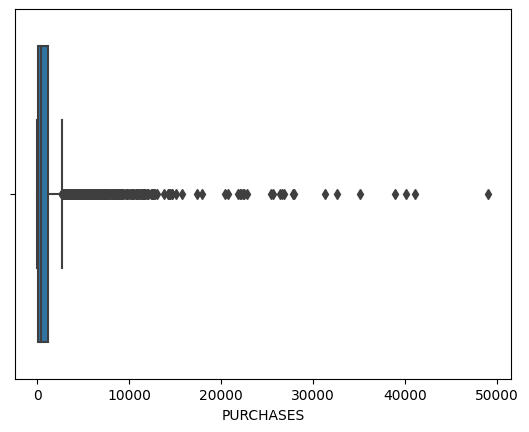

In [45]:
sns.boxplot(x=credit_df["PURCHASES"])

<AxesSubplot: xlabel='CASH_ADVANCE'>

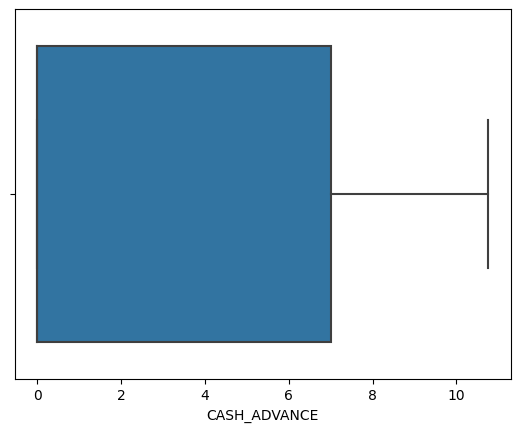

In [46]:
sns.boxplot(x=credit_df["CASH_ADVANCE"])

## Skewness Visualization

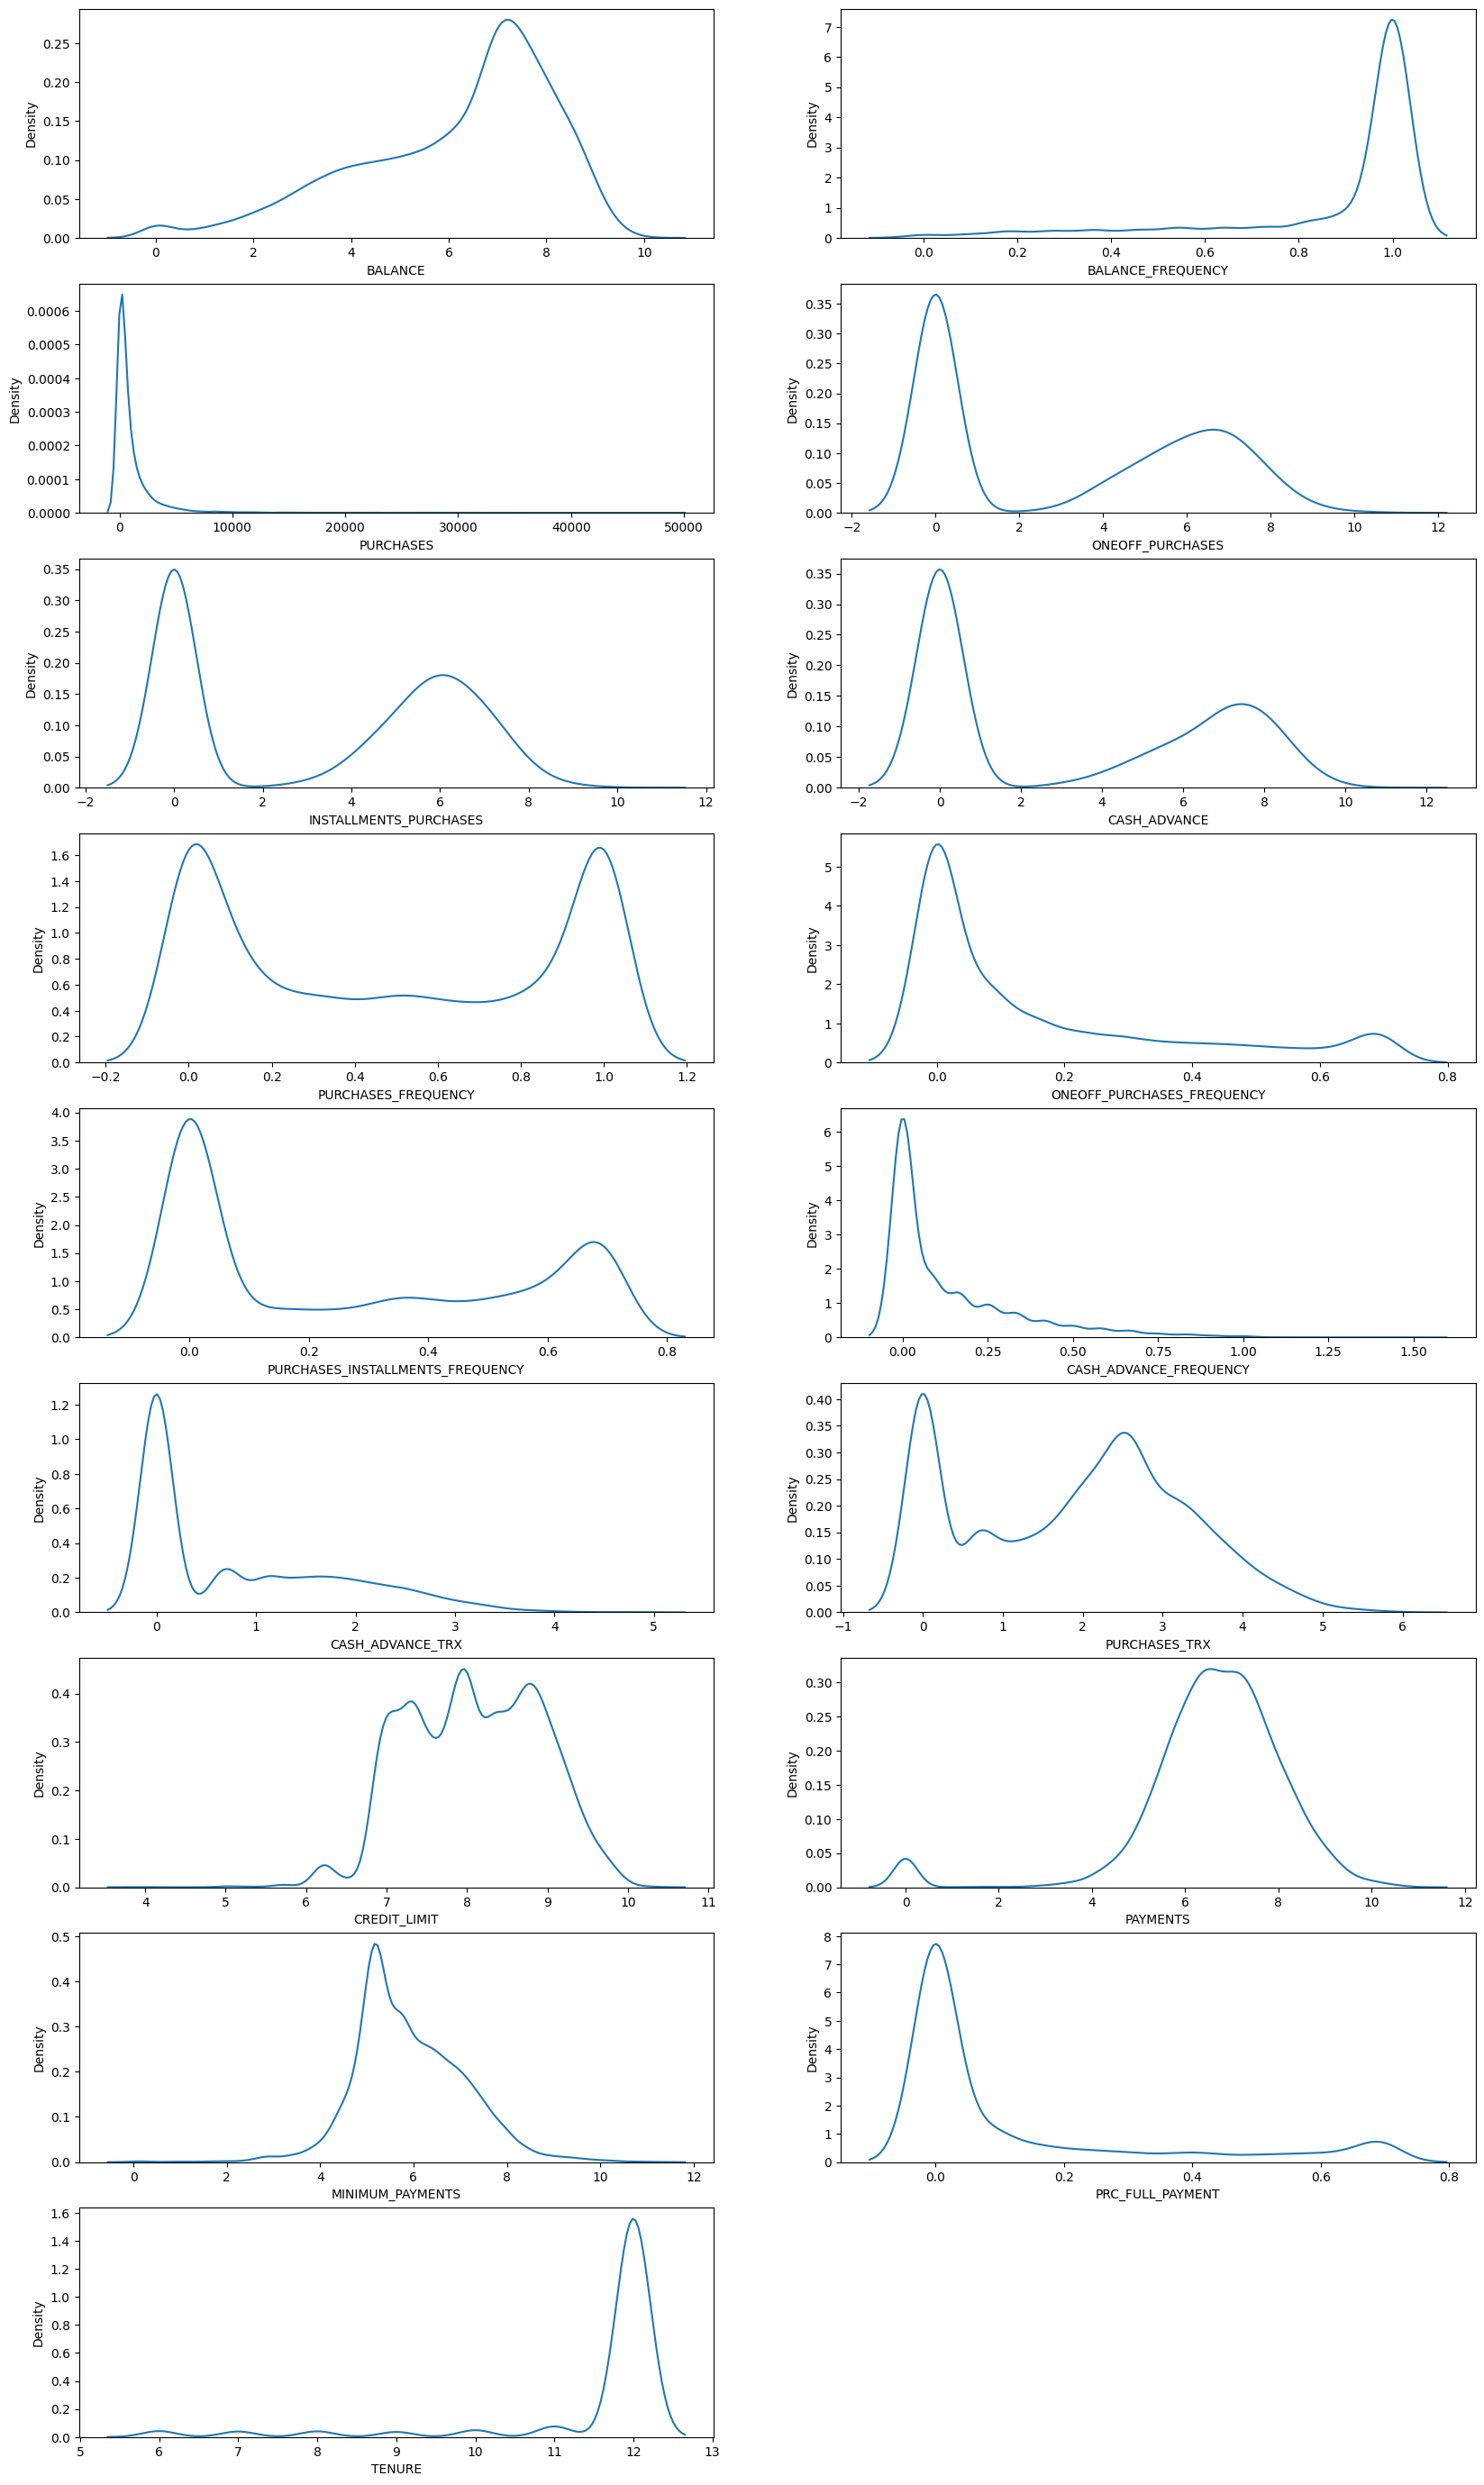

In [47]:
plt.figure(figsize=(20,35))

for i, column in enumerate(credit_df.columns):
    if credit_df[column].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(credit_df[column], ax=ax)
        plt.xlabel(column)      
plt.show()

The data is highly skewed across various features, which is not unusual for customer transaction datasets. However, it is important to address the skewness to improve clustering accuracy. Therefore, we will take steps to reduce the skewness in the data.

## Outlier Treatement - Logarithmic Transformation

In [48]:
col_names = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

for column in col_names:
    credit_df[column] = np.log(1 + credit_df[column])

In [49]:
Q1 = credit_df.quantile(0.25)
Q3 = credit_df.quantile(0.75)
IQR = Q3 - Q1
Upper_Whisker = Q3 + 1.5 * IQR
Lower_Whisker = Q1 - 1.5 * IQR
outlier = ((credit_df < Lower_Whisker)|(credit_df > Upper_Whisker))
print('Number of outliers after Log Transformation')
print('-------------------------------------------')
outlier.sum()

Number of outliers after Log Transformation
-------------------------------------------


BALANCE                              447
BALANCE_FREQUENCY                   1493
PURCHASES                            808
ONEOFF_PURCHASES                       0
INSTALLMENTS_PURCHASES                 0
CASH_ADVANCE                           0
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY             0
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                       0
PURCHASES_TRX                          0
CREDIT_LIMIT                           9
PAYMENTS                             341
MINIMUM_PAYMENTS                     167
PRC_FULL_PAYMENT                    1312
TENURE                              1366
dtype: int64

<AxesSubplot: xlabel='PURCHASES_FREQUENCY'>

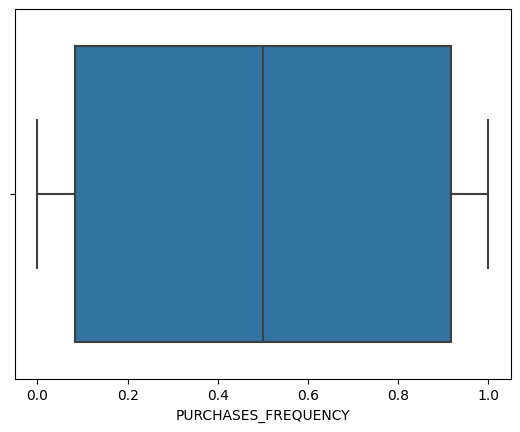

In [50]:
sns.boxplot(x=credit_df["PURCHASES_FREQUENCY"])

<AxesSubplot: xlabel='CASH_ADVANCE'>

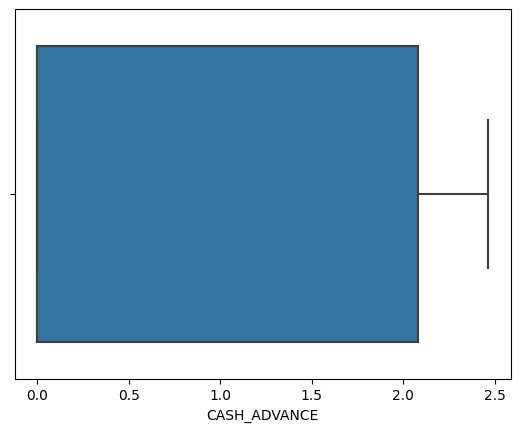

In [51]:
sns.boxplot(x=credit_df["CASH_ADVANCE"])

Log Transformation helps to reduce the impact of extreme values and make the distribution of values more symmetric.

The purpose of applying this transformation is to "normalize" the data in the column and make it more suitable for certain types of analyses. In some cases, the values in a column can be highly skewed or have a wide range of values, which can make it difficult to compare or analyze them. Applying a logarithmic transformation can help to reduce the impact of extreme values and make the distribution of values more symmetric.

The addition of 1 to the logarithm is known as the "logarithmic scaling" or "logarithmic scaling with a bias" and is often used to prevent issues with taking the logarithm of zero or negative values. The addition of 1 ensures that the result is always positive, and the impact of the bias is usually minimal for data that does not contain very small values.

## Correlation HeatMap

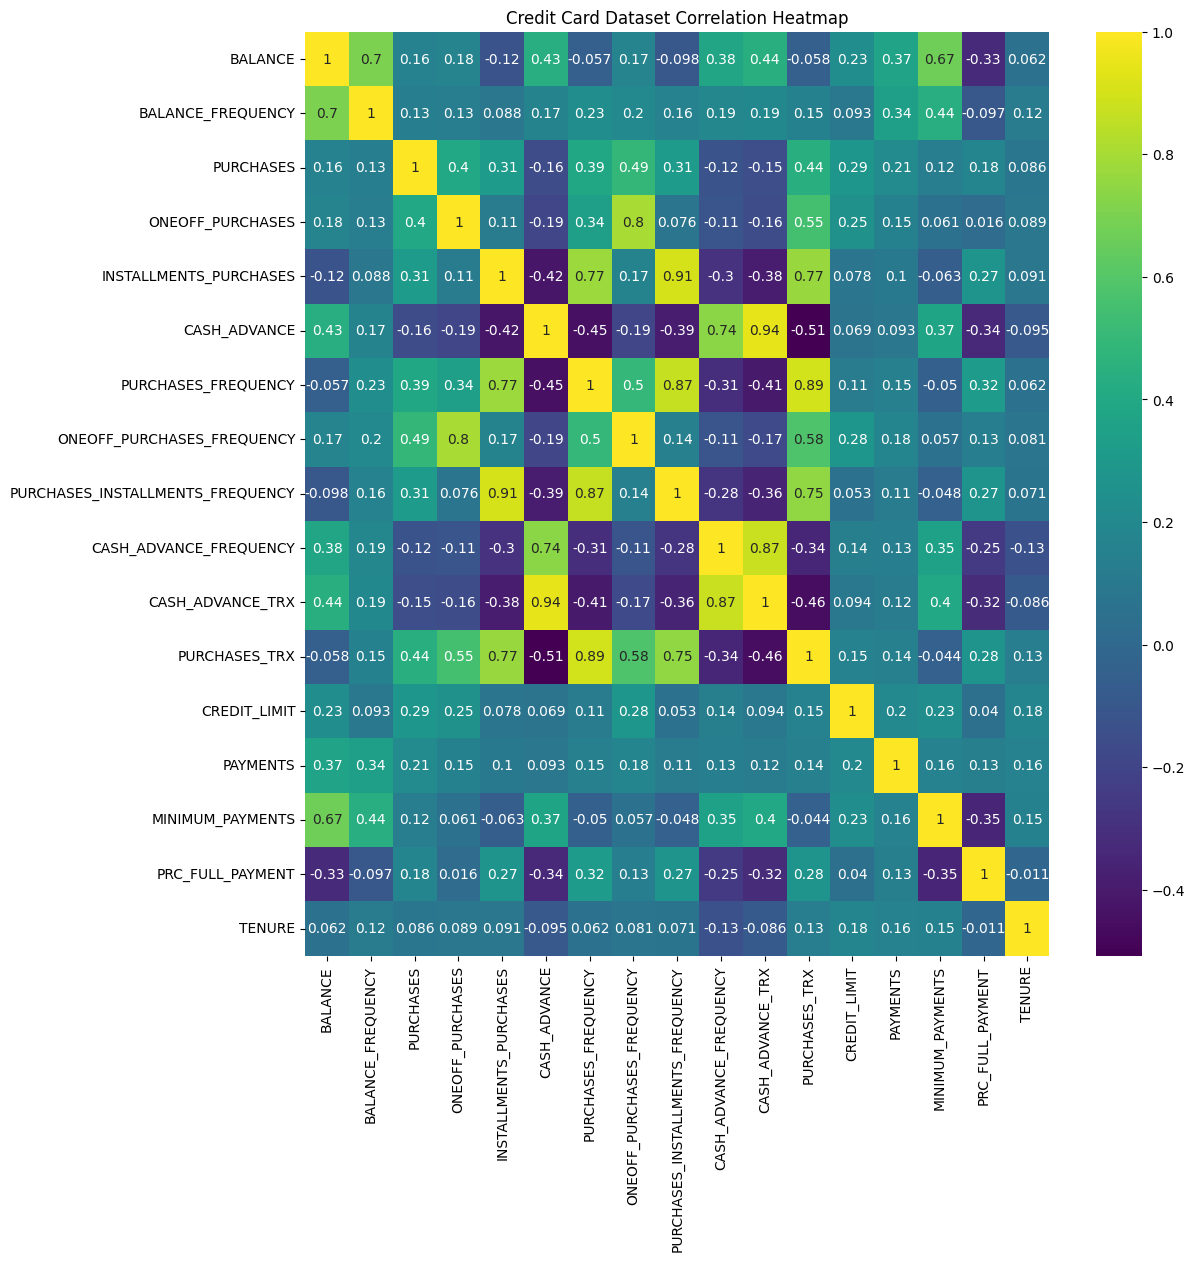

In [52]:
plt.figure(figsize=(12,12))
corr_matrix = credit_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Credit Card Dataset Correlation Heatmap')
plt.show()

The strongest correlations are between "One-off purchases" and "Purchases" since one-off purchases are considered part of the overall purchases made by the customer. Similarly, there are strong correlations between "Purchases Installment Frequency" and "Purchases Frequency," as well as between "Cash in Advance Transactions" and "Cash in Advance Frequency." These correlations suggest that the frequency of certain types of transactions is closely related to the total amount spent by the customer.

There are also medium correlations between "Installment Purchases" and "Purchases," since installment purchases are included in the overall purchases made. Additionally, there are correlations between "Balance" and "Cash in Advance Transactions/Frequency" and "Credit Limit," indicating that a customer's balance and payment behavior may influence their credit limit.

## Dimentionality Reduction - PCA

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(credit_df)

## KMeans Clustering

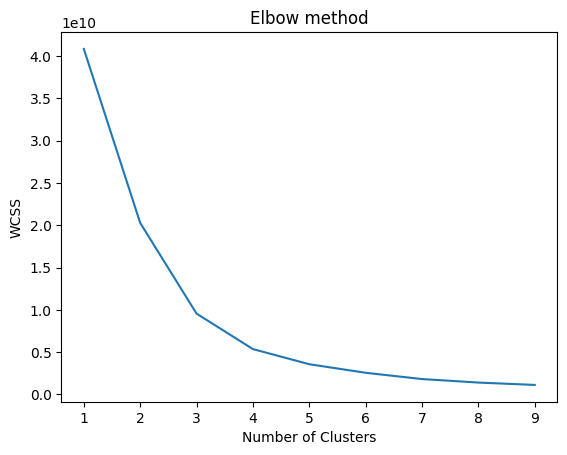

Number of Clusters: 1 | Cluster Error: 40854051731.7196
Number of Clusters: 2 | Cluster Error: 20280709736.8115
Number of Clusters: 3 | Cluster Error: 9553421580.8119
Number of Clusters: 4 | Cluster Error: 5357205476.5365
Number of Clusters: 5 | Cluster Error: 3567311243.5177
Number of Clusters: 6 | Cluster Error: 2554642740.6092
Number of Clusters: 7 | Cluster Error: 1812954868.0026
Number of Clusters: 8 | Cluster Error: 1397733683.5664
Number of Clusters: 9 | Cluster Error: 1118974456.8403


In [56]:
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(df_pca) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Print the number of clusters and cluster error for each model
for k, error in enumerate(innertia):
    print(f"Number of Clusters: {k+1} | Cluster Error: {error:.4f}")

It looks like the elbow is around 3 or 4 . We will use silhouette score to see which one performs better.

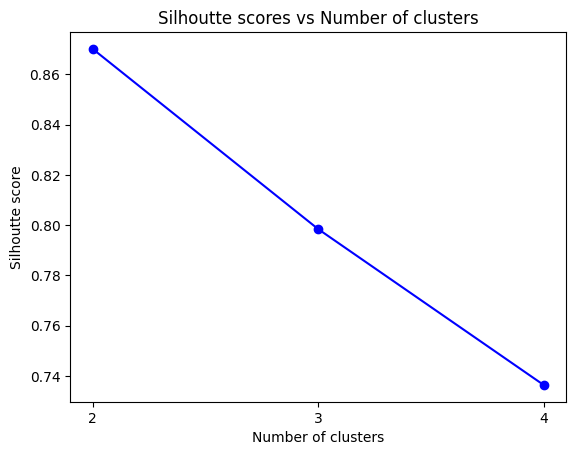

In [57]:
from sklearn.metrics import silhouette_score

silhoutte_scores = [silhouette_score(df_pca, model.labels_) for model in kmeans_models[1:4]]
plt.plot(range(2,5), silhoutte_scores, "bo-")
plt.xticks([2, 3, 4])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

It appears that the silhouette score is higher for n=2 compared to the other two values being considered.

**Cluster Number = 2**

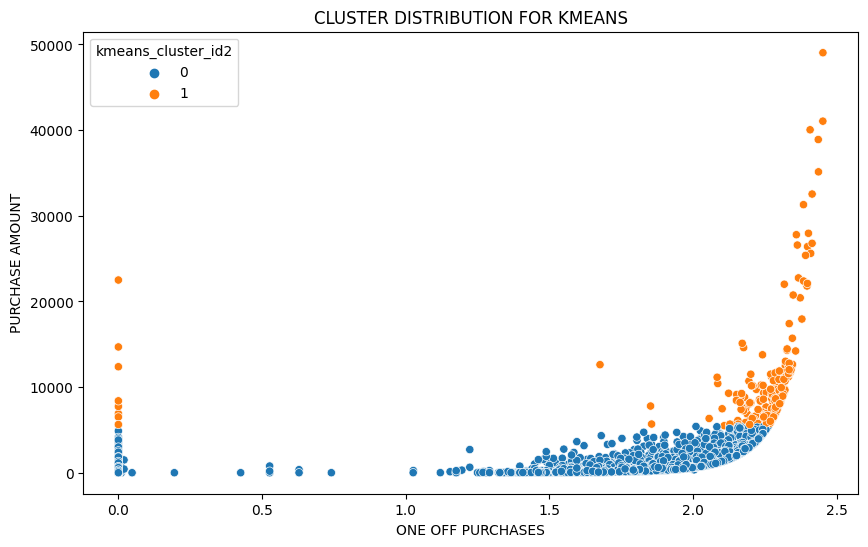

In [61]:
kmeans = KMeans(n_clusters=2, random_state=23)
kmeans.fit(df_pca)
credit_df['kmeans_cluster_id2'] = kmeans.labels_

plt.figure(figsize=(10,6))
sns.scatterplot(data=credit_df, x='ONEOFF_PURCHASES', y='PURCHASES', hue='kmeans_cluster_id2')
plt.title('CLUSTER DISTRIBUTION FOR KMEANS')
plt.xlabel('ONE OFF PURCHASES')
plt.ylabel('PURCHASE AMOUNT')
plt.show()

**Cluster Number = 3**

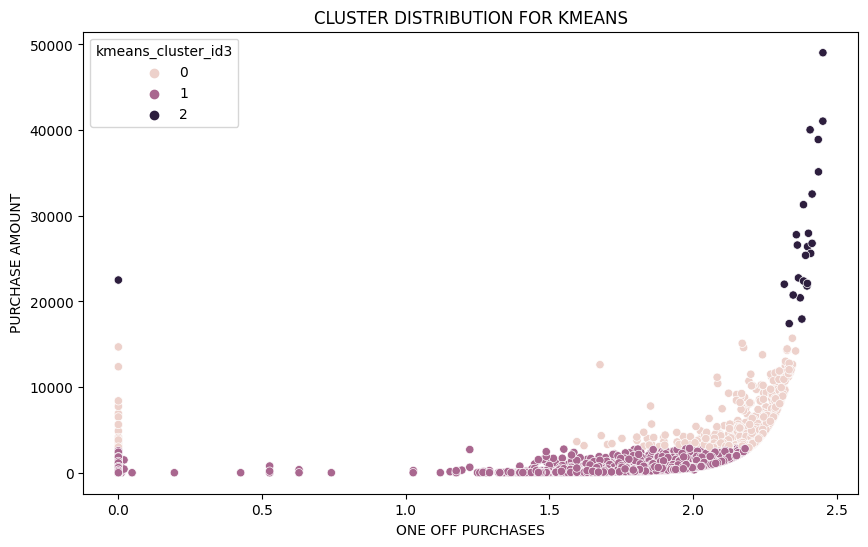

In [62]:
kmeans = KMeans(n_clusters=3, random_state=23)
kmeans.fit(df_pca)
credit_df['kmeans_cluster_id3'] = kmeans.labels_

plt.figure(figsize=(10,6))
sns.scatterplot(data=credit_df, x='ONEOFF_PURCHASES', y='PURCHASES', hue='kmeans_cluster_id3')
plt.title('CLUSTER DISTRIBUTION FOR KMEANS')
plt.xlabel('ONE OFF PURCHASES')
plt.ylabel('PURCHASE AMOUNT')
plt.show()

**Evaluation of KMeans Clustering**

In [63]:
from sklearn.metrics import silhouette_score

print('Silhoutte score for 2 clusters: ' + str(silhouette_score(df_pca, credit_df['kmeans_cluster_id2'])))
print('Silhoutte score for 3 clusters: ' + str(silhouette_score(df_pca, credit_df['kmeans_cluster_id3'])))

Silhoutte score for 2 clusters: 0.8700544449347282
Silhoutte score for 3 clusters: 0.7984410529428914


## Hierarchial Clustering

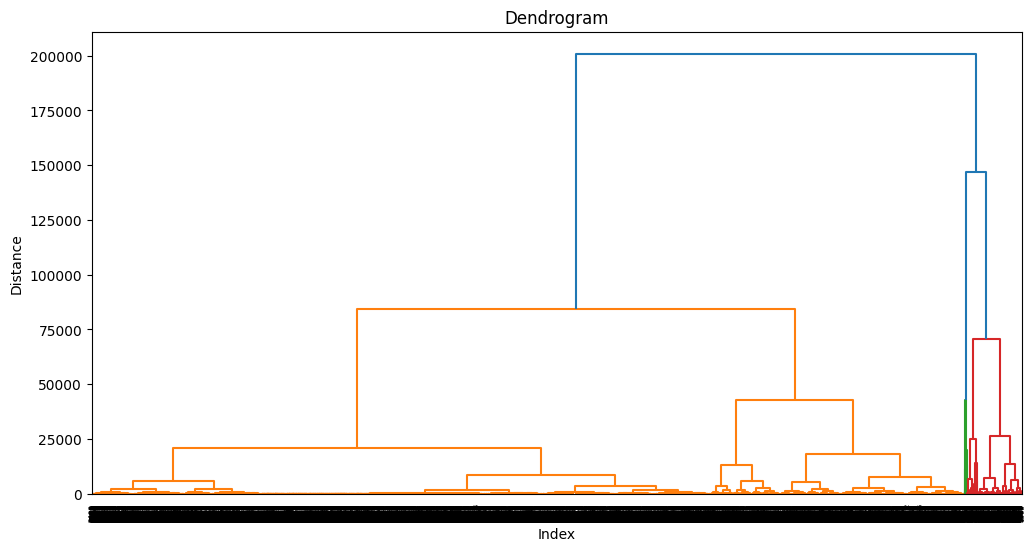

In [64]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering on the data
link = linkage(df_pca, method='ward')

# Plot the dendrogram
fig, ax = plt.subplots(figsize=(12, 6))
dendrogram(link, ax=ax)
plt.title('Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

**Agglomerative Clustering**

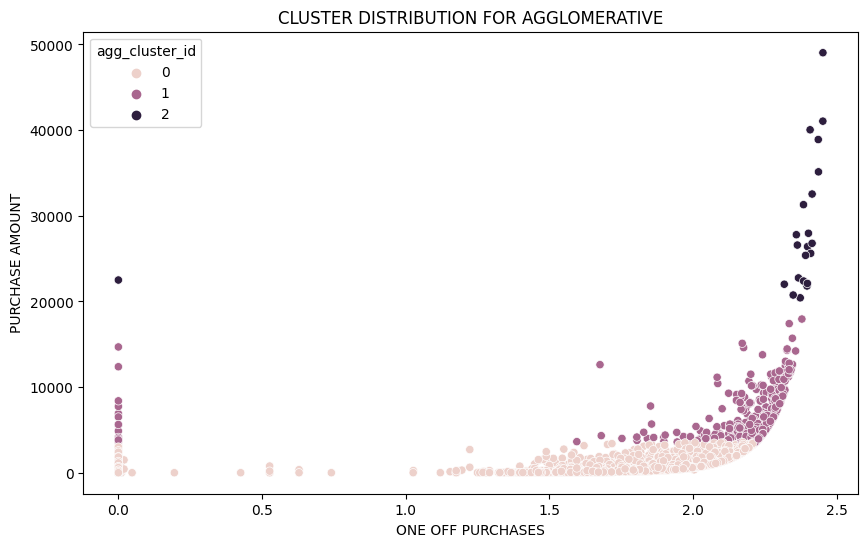

In [65]:
from sklearn.cluster import AgglomerativeClustering

# Perform agglomerative clustering on the data
agg = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg.fit(df_pca)

credit_df['agg_cluster_id'] = agg.labels_

plt.figure(figsize=(10,6))
sns.scatterplot(data=credit_df, x='ONEOFF_PURCHASES', y='PURCHASES', hue='agg_cluster_id')
plt.title('CLUSTER DISTRIBUTION FOR AGGLOMERATIVE')
plt.xlabel('ONE OFF PURCHASES')
plt.ylabel('PURCHASE AMOUNT')
plt.show()

**Evaluation of Agglomerative Clustering**

In [66]:
# Evaluate the silhouette score for the agglomerative clustering model
silhouette_agg = silhouette_score(df_pca, agg.labels_)

print("The Silhouette score for Agglomerative Clustering:", silhouette_agg)

The Silhouette score for Agglomerative Clustering: 0.8134130770547465


## Comparision of the Models using Scatter Plot

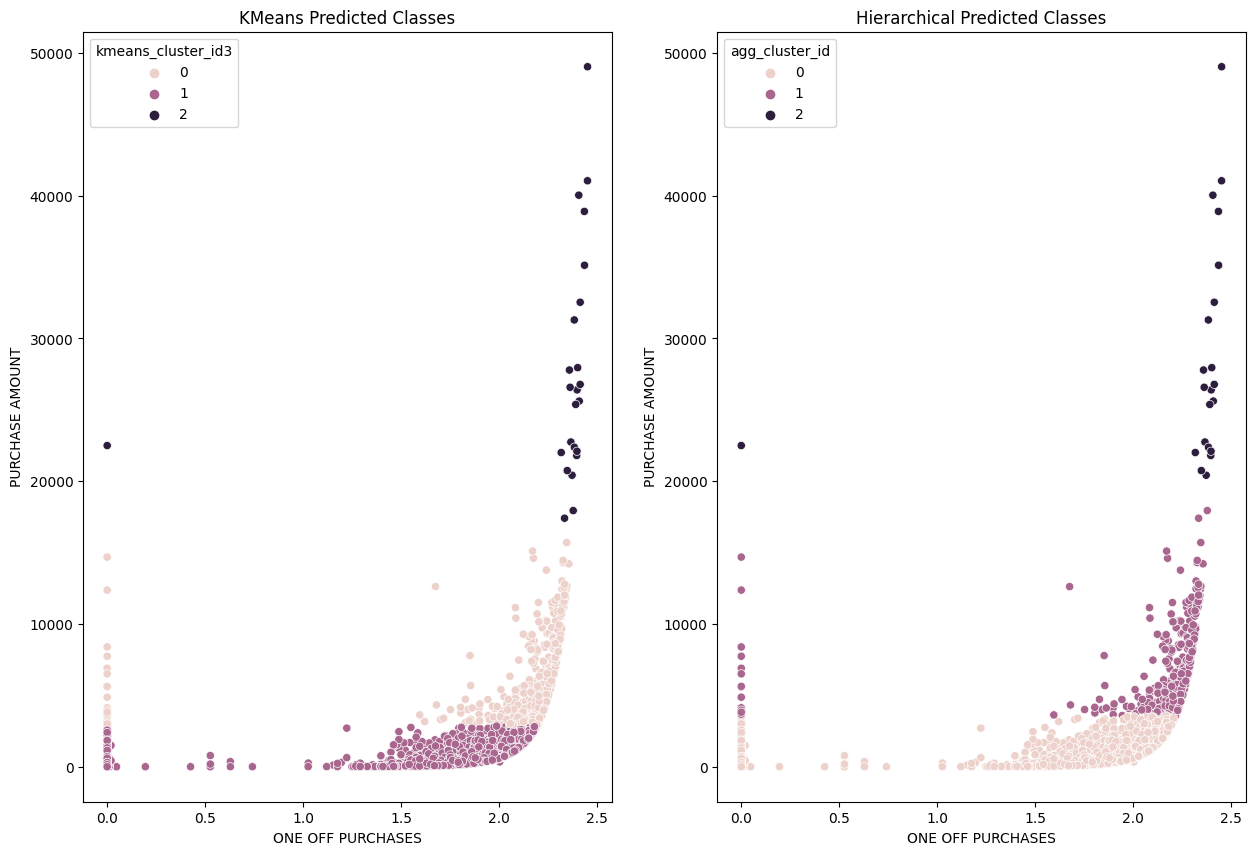

In [67]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,10))

ax1 = plt.subplot(1,2,1)
plt.title('KMeans Predicted Classes')
plt.xlabel('ONE OFF PURCHASES')
plt.ylabel('PURCHASE AMOUNT')
sns.scatterplot(data=credit_df, x='ONEOFF_PURCHASES', y='PURCHASES', hue='kmeans_cluster_id3')

ax2 = plt.subplot(1,2,2)
plt.title('Hierarchical Predicted Classes')
plt.xlabel('ONE OFF PURCHASES')
plt.ylabel('PURCHASE AMOUNT')
sns.scatterplot(data=credit_df, x='ONEOFF_PURCHASES', y='PURCHASES', hue='agg_cluster_id')

plt.show()

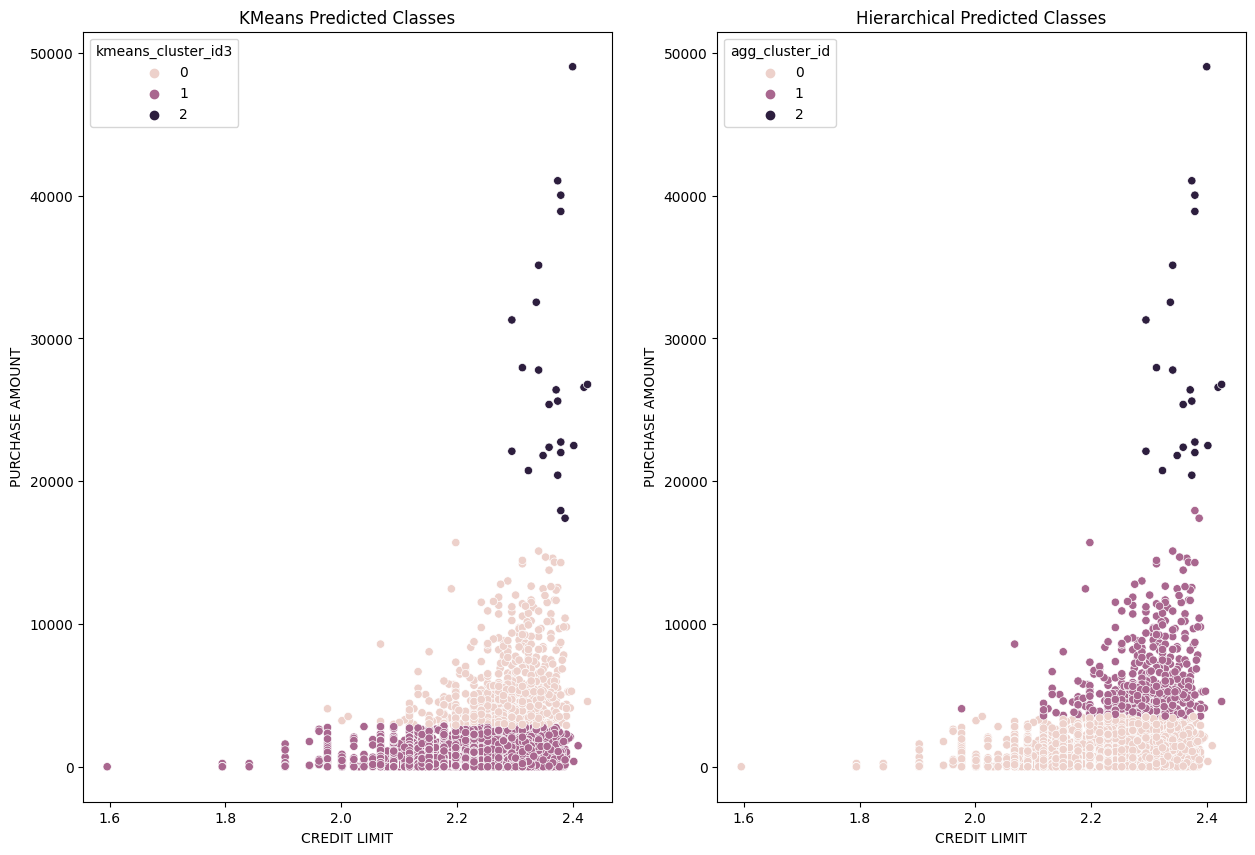

In [68]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,10))

ax1 = plt.subplot(1,2,1)
plt.title('KMeans Predicted Classes')
plt.xlabel('CREDIT LIMIT')
plt.ylabel('PURCHASE AMOUNT')
sns.scatterplot(data=credit_df, x='CREDIT_LIMIT', y='PURCHASES', hue='kmeans_cluster_id3')

ax2 = plt.subplot(1,2,2)
plt.title('Hierarchical Predicted Classes')
plt.xlabel('CREDIT LIMIT')
plt.ylabel('PURCHASE AMOUNT')
sns.scatterplot(data=credit_df, x='CREDIT_LIMIT', y='PURCHASES', hue='agg_cluster_id')

plt.show()

our model has clustered customers with low usage of credit card in one cluster and model with higher usage of clusters in other